In [6]:
import emd
import os
import numpy as np
import pandas as pd
from scipy.fft import fft
from scipy.signal import hilbert

import matplotlib.pyplot as plt
import FeatureExtraction

In [7]:
test = pd.read_csv("data/2nd_test.csv", sep='\t', names=['B1', 'B2', 'B3', 'B4'])

In [8]:
test.shape

(20152320, 4)

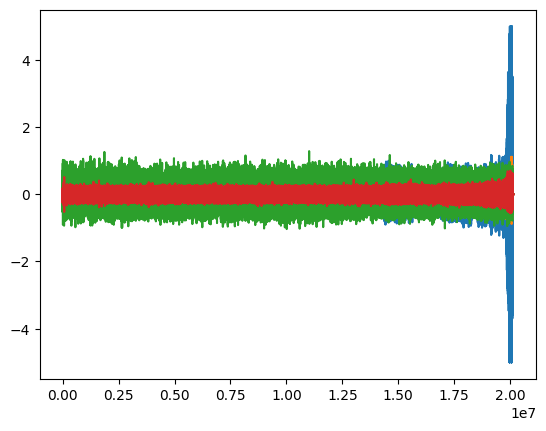

In [19]:
plt.plot(test['B1'])
plt.plot(test['B2'])
plt.plot(test['B3'])
plt.plot(test['B4'])

<Axes: xlabel='Time (samples)'>

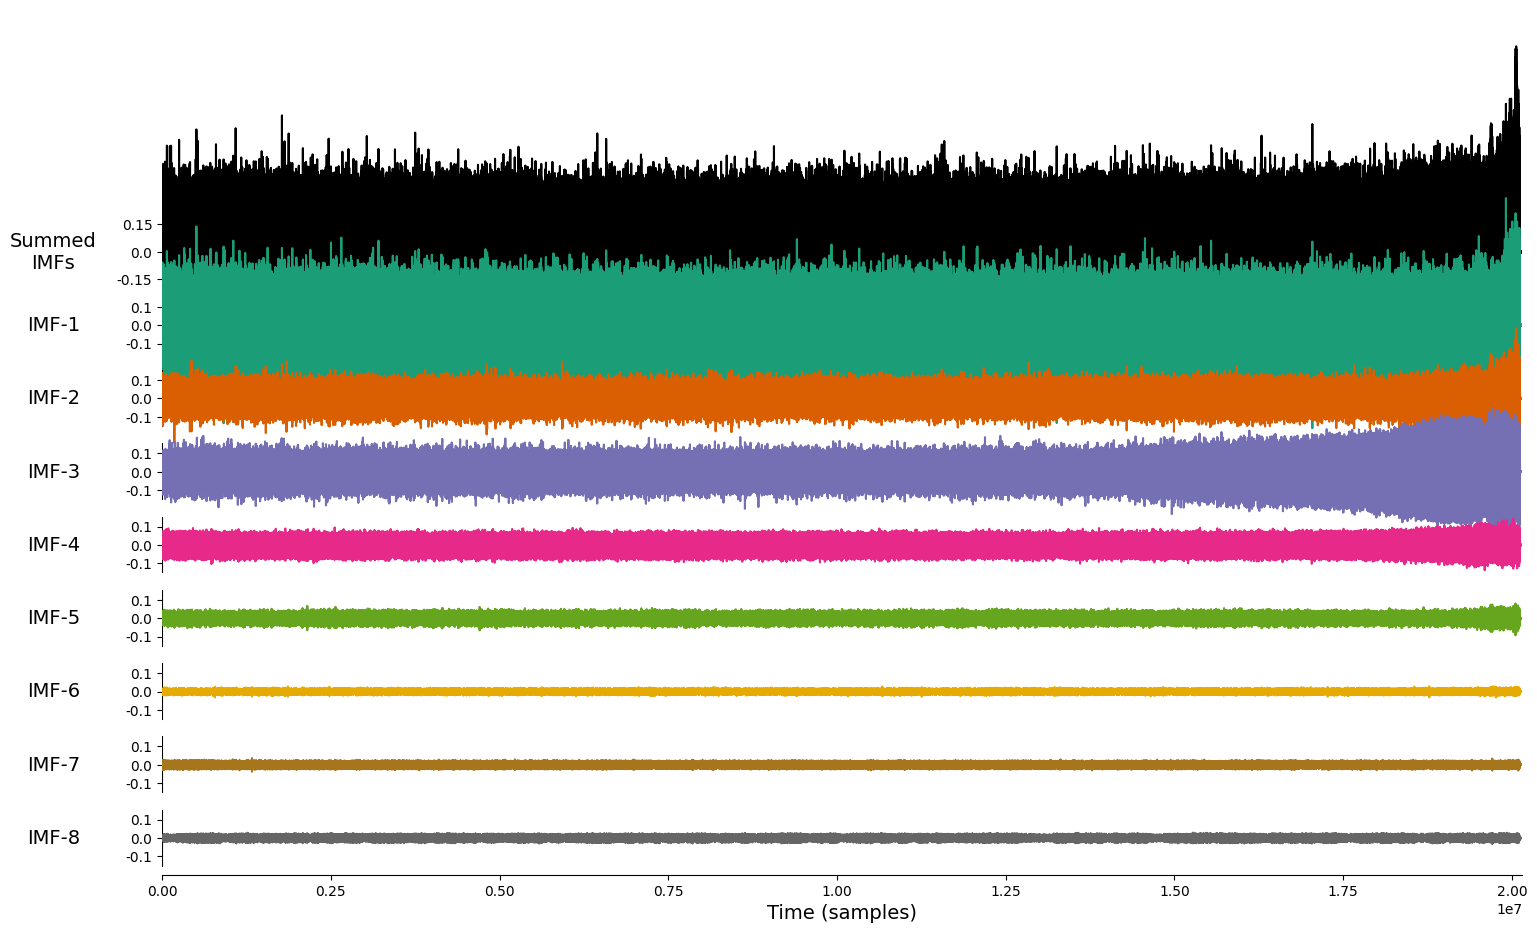

In [11]:
test2_bearing2 = np.array(test['B2'])
imf_test2_bearing2 = emd.sift.mask_sift(test2_bearing2, max_imfs=8)

emd.plotting.plot_imfs(imf_test2_bearing2[:, :])

In [24]:
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

def calculate_upper_envelope_hilbert(hilbert_signal):
    # Calculate magnitude of the Hilbert transformed signal
    envelope = np.abs(hilbert_signal)
    
    # Find local maxima
    maxima_indices, _ = find_peaks(envelope)
    maxima_values = envelope[maxima_indices]
    
    # Extend range of indices to cover entire signal length
    maxima_indices_extended = np.concatenate(([0], maxima_indices, [len(envelope) - 1]))
    maxima_values_extended = np.concatenate(([0], maxima_values, [0]))
    
    # Interpolate between local maxima
    interpolate_func = interp1d(maxima_indices_extended, maxima_values_extended, kind='cubic', bounds_error=False, fill_value=0)
    
    # Evaluate the interpolated function over the entire range
    upper_envelope = interpolate_func(np.arange(len(envelope)))
    
    return upper_envelope

In [30]:
imf1_test2_bearing2 = imf_test2_bearing2[:, 0]
imf2_test2_bearing2 = imf_test2_bearing2[:, 1]

hilbert_imf1_test2_bearing2 = hilbert(imf1_test2_bearing2)
hilbert_imf2_test2_bearing2 = hilbert(imf2_test2_bearing2)

envelope_imf1_test2_bearing = calculate_upper_envelope_hilbert(envelope_imf1_test2_bearing)



# envelope_imf1_test2_bearing = np.abs(hilbert_imf1_test2_bearing2) #envelope extraction
# envelope_imf2_test2_bearing = np.abs(hilbert_imf2_test2_bearing2)
hilbert_fourier1 = fft(hilbert_imf1_test2_bearing2)
envelope_fourier1 = fft(envelope_imf1_test2_bearing)
# # plt.plot(np.abs(envelope_fourier1))
# plt.plot(envelope_fourier1)


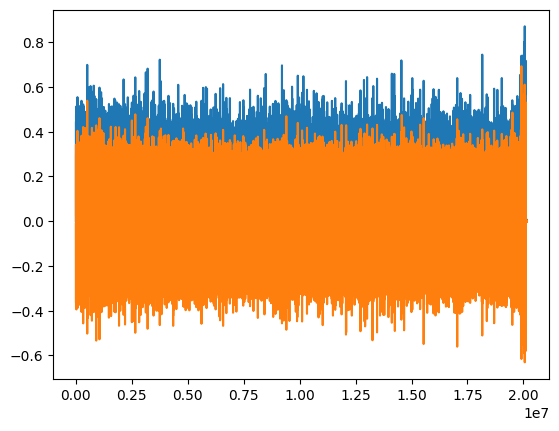

In [37]:
plt.plot(envelope_imf1_test2_bearing)
# plt.show()
plt.plot(imf1_test2_bearing2)
# plt.xlim(0.5, max(envelope_fourier1))
plt.show()

In [32]:
envelope_fourier1

array([2922072.91795848   -0.j        ,   47642.75199576-1350.17947731j,
         19434.10837674+3936.15108165j, ...,
         21780.5865678 -4502.18070164j,   19434.10837674-3936.15108165j,
         47642.75199576+1350.17947731j])

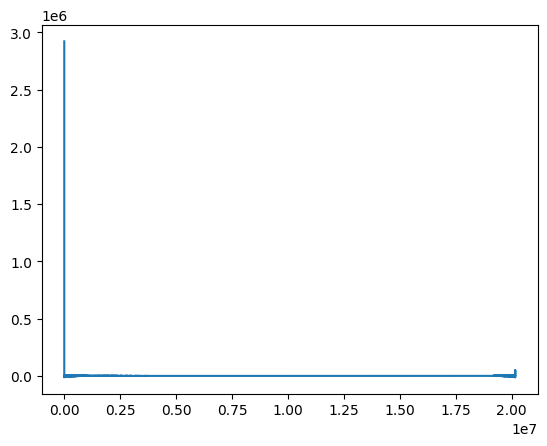

In [34]:
plt.plot(envelope_fourier1)

In [29]:
directories = ["data/IMS/1st_test/1st_test", "data/IMS/2nd_test/2nd_test", "data/IMS/3rd_test/4th_test/txt"]

for directory in directories:
    for fileName in os.listdir(directory):
        filePath = os.path.join(directory, fileName)

        if (fileName != ".ipynb_checkpoints"):
            
            if (directory == "data/IMS/1st_test/1st_test") :
                col_names = ['B1A', 'B1B', 'B2A', 'B2B', 'B3A', 'B3B', 'B4A', 'B4B']
            else: 
                col_names = ['B1', 'B2', 'B3', 'B4']
 
            data = pd.read_csv(filePath, sep='\t', names=col_names)

# x = np.array(data['-0.132'])

# # imf = emd.sift.mask_sift(x, max_imfs=8)
# imf = emd.sift.mask_sift(x, max_imfs=8)


# emd.plotting.plot_imfs(imf[:, :])

,B1,B2,B3,B4
0,-0.015,0.071,-0.066,-0.044
1,0.015,0.068,-0.063,-0.017
2,-0.007,-0.066,-0.068,0.015
3,0.012,0.034,-0.110,0.020
4,0.010,-0.083,0.042,0.024
...,...,...,...,...
20475,-0.017,0.044,0.190,0.015
20476,-0.054,0.054,0.100,0.042
20477,-0.122,-0.044,-0.002,0.029
20478,-0.012,-0.005,0.073,0.049


(20480, 3)

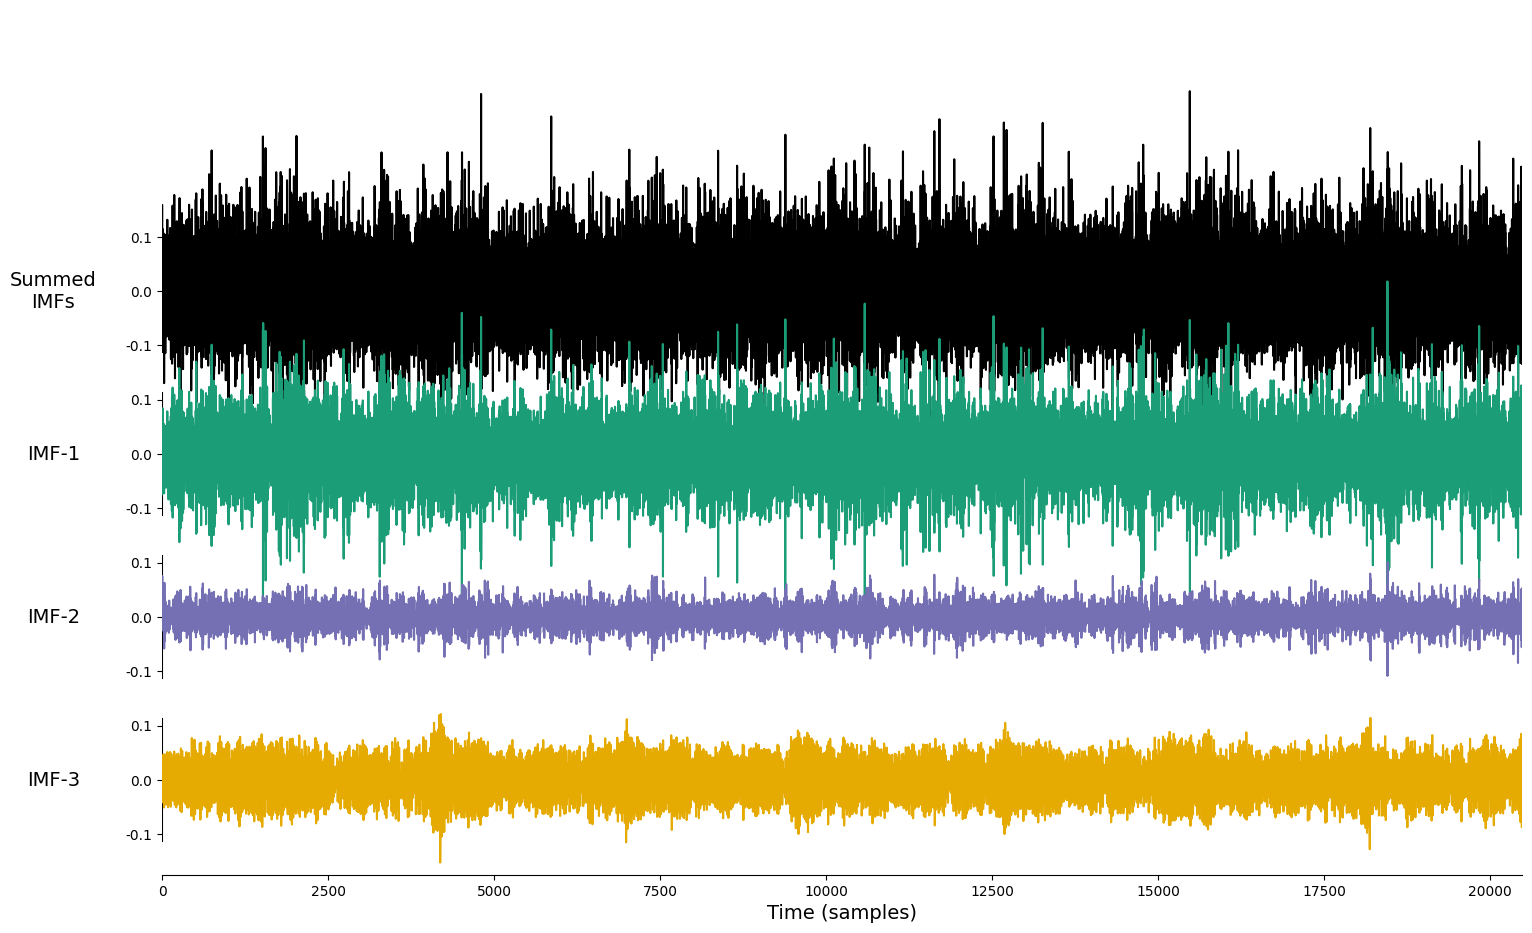

In [43]:
test3_B2 = np.array(data['B2'])

imf = emd.sift.mask_sift(test3_B2, max_imfs=3)

emd.plotting.plot_imfs(imf[:, :])

imf.shape

In [48]:
imf1 = imf[:, 0]
imf2 = imf[:, 1]

hilbert_imf1 = hilbert(imf1)
hilbert_imf2 = hilbert(imf2)

hilbert_imf1.shape

np.save("test", hilbert_imf1)
np.load('test.npy')

array([ 0.06727242-0.09264947j,  0.04681343+0.09680132j,
       -0.07452186-0.02436896j, ..., -0.0503649 +0.00567165j,
        0.009471  +0.0070093j , -0.07324055-0.01649277j])

In [49]:
envelope_imf1 = np.abs(hilbert_imf1) #envelope extraction
envelope_imf2 = np.abs(hilbert_imf2)

(20480,)

20480


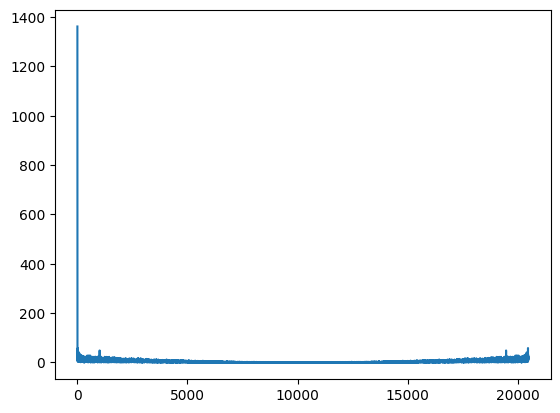

In [58]:
envelope_fourier1 = fft(envelope_imf1)
envelope_fourier1.shape

magnetude_spectrum_envelope_fourier1  = np.abs(envelope_fourier1)

frequency = np.linspace(0, 20000, len(magnetude_spectrum_envelope_fourier1))
num_frequency_bins = int(len(frequency) * 1)

print(num_frequency_bins)

plt.plot(np.abs(envelope_fourier1))
